# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data

In [2]:
data = pd.read_csv("crop_production.csv")
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Exploratory Data Anlysis

In [3]:
# checking whether all the states are present (Total States = 28, Union Terretories = 8)....
unique_states = data['State_Name'].unique()
print(unique_states)
len(unique_states)
# Assuming all states are present and some of the Union Terretories are missing.....

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


33

In [4]:
Union_Terretories = np.array(['Andaman and Nicobar Islands', 'Chandigarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 
                              'Delhi', 'Jammu and Kashmir', 'Ladakh', 'Lakshadweep', 'Puducherry'], dtype = 'str')
for state in Union_Terretories:
    is_present = False
    for j in unique_states:
        if state == j:
            is_present = True
    if is_present == False:
        print(f'The State {state} is not present.')

The State Daman and Diu is not present.
The State Delhi is not present.
The State Jammu and Kashmir is not present.
The State Ladakh is not present.
The State Lakshadweep is not present.


In [5]:
# Checking for NULL values....
data.isnull().any()
# Only Production column is having NULL values

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [6]:
no_of_null_values = data['Production'].isnull().sum()
print(f'There are total {no_of_null_values} NULL values present.')
percentage_null_values = (no_of_null_values / data['Production'].shape[0]) * 100
print(f'{percentage_null_values}% NULL values are there.')

There are total 3730 NULL values present.
1.5156994770227274% NULL values are there.


In [7]:
# Used ffill (forward-fill) method to fill NaN values....
data['Production'].fillna(method = 'ffill', inplace=True)
data['Production'].isnull().any()

False

In [8]:
data.info() # All the data-types are in proper manner

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
# No. of years in the dataset....
years = data['Crop_Year'].unique()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

# Production Analysis

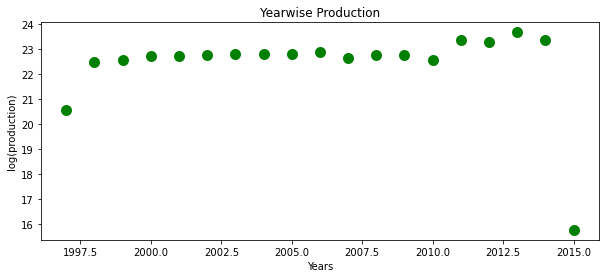

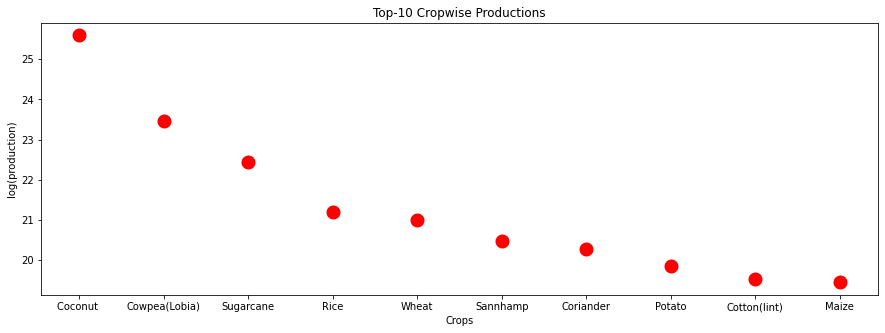

In [10]:
# Yearwise production........
yearwise_production = []
total_production = data['Production'].sum()
for year in years:
    yearwise_production.append(data[data['Crop_Year']==year]['Production'].sum())
    # This is year-wise total production made.....
yearwise_production = np.array(yearwise_production)
plt.figure(figsize=(10,4))
plt.subplot()
plt.scatter(years, np.log(yearwise_production), color = 'green', linewidth = 5)
plt.xlabel("Years")
plt.ylabel('log(production)')
plt.title('Yearwise Production')
plt.show()

# Cropwise Production (TOP 10)........
unique_crops = data['Crop'].unique()
cropwise_production = []
for crop in unique_crops:
    cropwise_production.append(data[data['Crop'] == crop]['Production'].sum())
    #This is crop-wise total production for all years.....
cropwise_production = np.array(cropwise_production)
# top 10 productive crops
arg_sorted = np.flip(np.argsort(cropwise_production)[-10:]) # indices of 10 maximum productions
top_10_crops = {}  # To store top-10 productions
for i in range(10):
    top_10_crops[unique_crops[arg_sorted[i]]] = cropwise_production[arg_sorted[i]]
temp_crops = []
for i in top_10_crops.keys():
    temp_crops.append(i)
temp_production = []
for i in top_10_crops.values():
    temp_production.append(i)
plt.figure(figsize=(15,5))
plt.subplot()
plt.scatter(x = temp_crops, y = np.log(np.array(temp_production)), linewidth = 8, color = 'red')
plt.title('Top-10 Cropwise Productions')
plt.xlabel("Crops")
plt.ylabel('log(production)')
plt.show()

In [11]:
seasons = data['Season'].unique() # different seasons in the data....
seasons

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

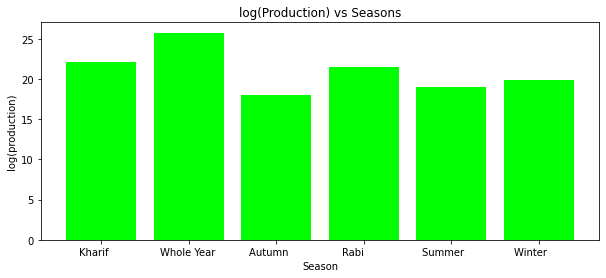

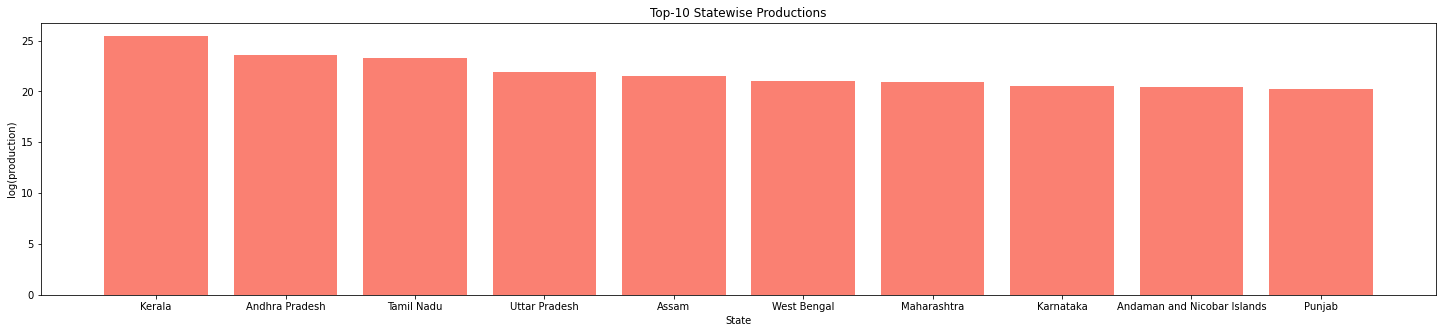

In [12]:
# Season-wise Production ......
seasonwise_production = []
for season in seasons:
    seasonwise_production.append(data[data['Season'] == season]['Production'].sum())
    #This is season-wise total production made....
seasonwise_production = np.array(seasonwise_production)
plt.figure(figsize=(10,4))
plt.subplot()
plt.bar(seasons, np.log(seasonwise_production), color = 'lime')
plt.title('log(Production) vs Seasons')
plt.xlabel("Season")
plt.ylabel('log(production)')
plt.show()


# Statewise production (TOP 10)........
statewise_production = []
for state in unique_states:
    statewise_production.append(data[data['State_Name']==state]['Production'].sum())
statewise_production = np.array(statewise_production)
# top 10 productive states
arg_sorted = np.flip(np.argsort(statewise_production)[-10:]) # indices of 10 maximum productions
top_10_states = {}
for i in range(10):
    top_10_states[unique_states[arg_sorted[i]]] = statewise_production[arg_sorted[i]]
temp_states = []
for i in top_10_states.keys():
    temp_states.append(i)
temp_production = []
for i in top_10_states.values():
    temp_production.append(i)
plt.figure(figsize=(25,5))
plt.subplot()
plt.bar(temp_states, np.log(np.array(temp_production)), color = "salmon")
plt.title('Top-10 Statewise Productions')
plt.xlabel("State")
plt.ylabel('log(production)')
plt.show()

# Area Analysis

In [13]:
mean_area_statewise = []
for state in unique_states:
    mean_area_statewise.append(data[data['State_Name'] == state]['Area'].mean()) #mean of statewise area involved
mean_area_statewise = np.array(mean_area_statewise)
top_10_states_areawise = {}
arg_sort_areawise = np.flip(np.argsort(mean_area_statewise)[-10:]) # indices of top-10 states areawise
for i in range(10):
    top_10_states_areawise[unique_states[arg_sort_areawise[i]]] = mean_area_statewise[arg_sort_areawise[i]]
top_10_states_areawise

{'Punjab': 39938.728647967226,
 'Maharashtra': 25515.223075704784,
 'West Bengal': 22407.702888796422,
 'Rajasthan': 21737.646236215438,
 'Gujarat': 18367.001422475107,
 'Haryana': 15250.605276595745,
 'Telangana ': 14402.659585767393,
 'Madhya Pradesh': 14375.327376541865,
 'Andhra Pradesh': 13662.842127129206,
 'Uttar Pradesh': 13019.624992493846}

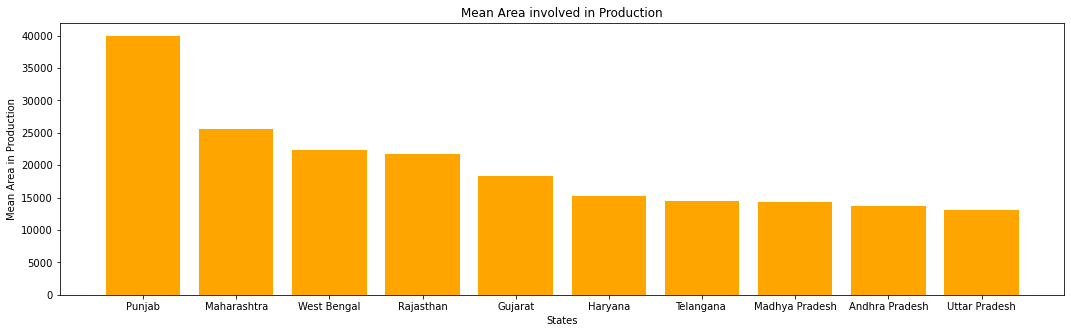

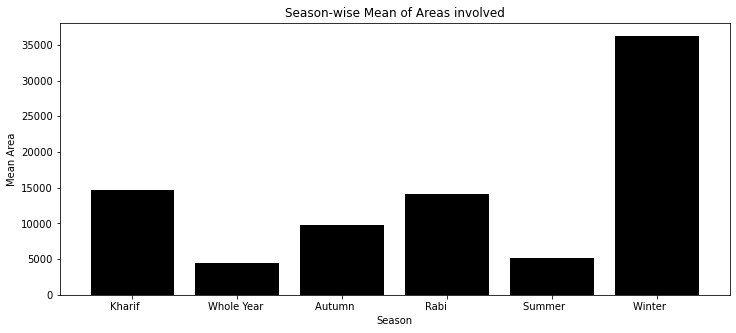

In [14]:
# State-wise plots (TOP-10).....
temp_states = []
for i in top_10_states_areawise.keys():
    temp_states.append(i)
temp_states = np.array(temp_states)
temp_area = []
for i in top_10_states_areawise.values():
    temp_area.append(i)
temp_area = np.array(temp_area)
plt.figure(figsize=(18, 5))
plt.bar(temp_states, temp_area, color = 'orange')
plt.xlabel('States')
plt.ylabel("Mean Area in Production")
plt.title("Mean Area involved in Production")
plt.show()

# Season-wise plots.....
seasonwise_area = []
for season in seasons:
    seasonwise_area.append(data[data['Season'] == season]['Area'].mean())
seasonwise_area = np.array(seasonwise_area)
plt.figure(figsize=(12,5))
plt.subplot()
plt.bar(seasons, seasonwise_area, color = 'black')
plt.xlabel('Season')
plt.ylabel('Mean Area')
plt.title('Season-wise Mean of Areas involved')
plt.show()

# Production per Area Analysis
<p style="text-align: center;">Metrics = <b> Total_seasonwise_production / Total_seasonwise_area </b> </p>

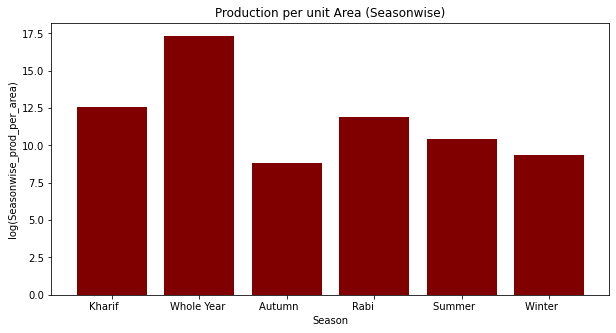

In [15]:
seasonwise_prod_per_area = seasonwise_production/seasonwise_area
plt.figure(figsize=(10, 5))
plt.bar(seasons, np.log(seasonwise_prod_per_area), color = 'maroon')
plt.xlabel("Season")
plt.ylabel("log(Seasonwise_prod_per_area)")
plt.title("Production per unit Area (Seasonwise)")
plt.show()

In [16]:
total_statewise_prod = []
total_statewise_area = []
for state in unique_states:
    total_statewise_area.append(data[data['State_Name'] == state]['Area'].sum()) # statewise sum of area for all states
    total_statewise_prod.append(data[data['State_Name'] == state]['Production'].sum()) # statewise sum of produciton for 
                                                                                     # all states
prod_per_area_statewise = np.array(total_statewise_prod) / np.array(total_statewise_area)
arg_sort_per = np.flip(np.argsort(prod_per_area_statewise)[-10:]) # indices of top-10 positions
top_10_prod_per_area = {}
for i in range(10):
    top_10_prod_per_area[unique_states[arg_sort_per[i]]] = prod_per_area_statewise[arg_sort_per[i]]
top_10_prod_per_area

{'Kerala': 3551.6963681018974,
 'Andaman and Nicobar Islands': 2279.556705261473,
 'Puducherry': 701.1156335764348,
 'Goa': 419.51207105033217,
 'Andhra Pradesh': 137.55930303659005,
 'Tamil Nadu': 132.5974555923126,
 'Assam': 30.00552867102315,
 'Uttar Pradesh': 7.478839112128421,
 'Uttarakhand': 7.17904192792502,
 'West Bengal': 6.49040489275244}

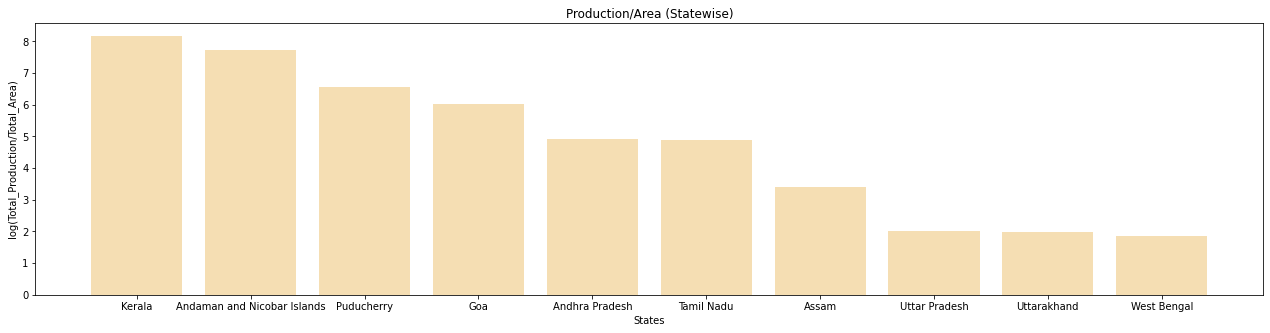

In [17]:
temp_states = []
for i in top_10_prod_per_area.keys():
    temp_states.append(i)
temp_quantity = []
for i in top_10_prod_per_area.values():
    temp_quantity.append(i)
temp_states = np.array(temp_states)
temp_quantity = np.array(temp_quantity)
plt.figure(figsize=(22, 5))
plt.bar(temp_states, np.log(temp_quantity), color = 'wheat')
plt.xlabel("States")
plt.ylabel('log(Total_Production/Total_Area)')
plt.title("Production/Area (Statewise)")
plt.show()

# For live Dashboard:
link:- https://public.tableau.com/views/Crops_Analysis/Analysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link